<a href="https://colab.research.google.com/github/peterbabulik/QantumBloomCircuits/blob/main/QuantumBloomCircuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

=== Quantum L-System Bloom Circuit Generator ===

1. Initial Configuration:
Number of qubits: 4
Initial state: XYZC

2. Evolving L-System...
Iteration 1 length: 8
Iteration 2 length: 16
Iteration 3 length: 48
Final evolved state length: 48
Sample of evolved state: XYXYYZYZZCZCYZZCZCZCZCCXZCZCCXCXXYXYCXXYXYXYXYYZ...

3. Generated Quantum Circuit Structure:
                                                                                                                                                                 ┌──┐
0: ───Rx(1.2*θ_0_0)───Ry(0.8*θ_1_4)───Rz(1.0*θ_2_8)────X───Ry(0.8*θ_3_12)───Rz(1.0*θ_4_16)───X────────────────Rz(1.0*θ_5_20)───X────────────────Rz(1.0*θ_6_24)─────X────@────────────────Rx(1.2*θ_8_32)────────────────────@────────────────Rx(1.2*θ_10_40)───Rx(1.2*θ_11_44)─────────────────────
                                                       │                                     │                                 │                                   │    │                

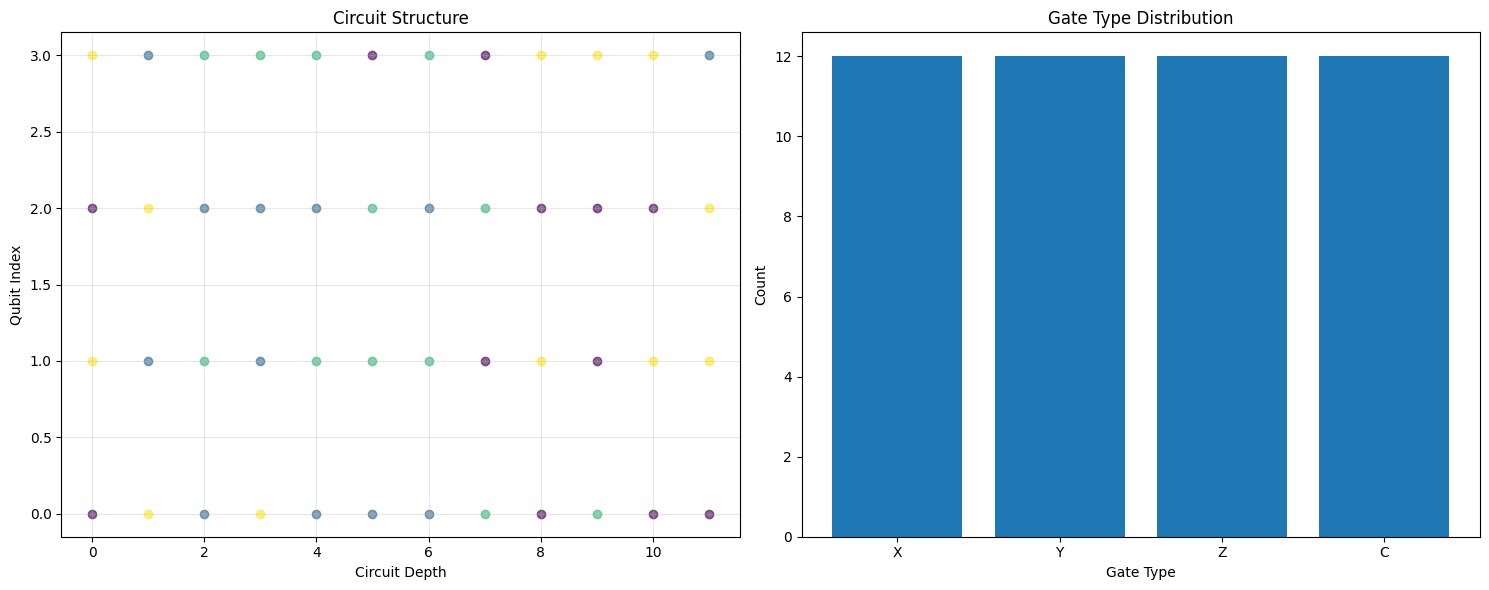


5. Circuit Statistics:
Total number of parameters: 48
Circuit depth: 18
Unique gate types: {'X', 'Z', 'C', 'Y'}


In [3]:
import cirq
import numpy as np
import sympy
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List, Dict, Tuple
import random

@dataclass
class BloomLRule:
    """L-system rule with logarithmic bloom parameters"""
    predecessor: str
    successor: List[str]
    bloom_factor: float
    scaling: float
    rotation: float

class QuantumBloomLSystem:
    def __init__(self, n_qubits: int):
        self.n_qubits = n_qubits
        self.qubits = cirq.LineQubit.range(n_qubits)
        self.rules: Dict[str, BloomLRule] = {}
        self.axiom = ""
        self.current_state = ""
        self.params = []
        self.layer_idx = 0

    def add_rule(self, symbol: str, successor: List[str],
                 bloom_factor: float = 1.0, scaling: float = 0.5,
                 rotation: float = np.pi/4):
        """Add a production rule with bloom parameters"""
        self.rules[symbol] = BloomLRule(
            predecessor=symbol,
            successor=successor,
            bloom_factor=bloom_factor,
            scaling=scaling,
            rotation=rotation
        )

    def set_axiom(self, axiom: str):
        """Set the initial state of the L-system"""
        self.axiom = axiom
        self.current_state = axiom

    def evolve(self, iterations: int) -> str:
        """Evolve the L-system with logarithmic bloom scaling"""
        state = self.current_state

        for i in range(iterations):
            new_state = []
            scale_factor = np.log2(i + 2)  # Logarithmic scaling

            for symbol in state:
                if symbol in self.rules:
                    rule = self.rules[symbol]
                    # Apply bloom factor and scaling
                    bloom_scale = max(1, int(rule.bloom_factor * scale_factor))
                    successors = rule.successor * bloom_scale
                    new_state.extend(successors)
                else:
                    new_state.append(symbol)

            state = ''.join(new_state)
            print(f"Iteration {i+1} length: {len(state)}")

        self.current_state = state
        return state

    def select_qubits(self, current_idx: int) -> Tuple[int, int]:
        """Select two different qubits for two-qubit gates"""
        q1 = current_idx % self.n_qubits
        q2 = (q1 + 1 + int(np.log2(self.layer_idx + 2))) % self.n_qubits
        while q2 == q1:
            q2 = (q2 + 1) % self.n_qubits
        return q1, q2

    def generate_quantum_circuit(self) -> cirq.Circuit:
        """Generate quantum circuit based on L-system state"""
        circuit = cirq.Circuit()
        qubit_idx = 0
        self.layer_idx = 0
        moment_operations = []

        for symbol in self.current_state:
            if symbol not in self.rules:
                continue

            rule = self.rules[symbol]
            param = sympy.Symbol(f'θ_{self.layer_idx}_{qubit_idx}')
            self.params.append(param)

            # Single-qubit gates
            current_qubit = self.qubits[qubit_idx % self.n_qubits]
            if symbol == 'X':
                moment_operations.append(
                    cirq.rx(param * rule.bloom_factor)(current_qubit))
            elif symbol == 'Y':
                moment_operations.append(
                    cirq.ry(param * rule.bloom_factor)(current_qubit))
            elif symbol == 'Z':
                moment_operations.append(
                    cirq.rz(param * rule.bloom_factor)(current_qubit))
            elif symbol == 'C':
                # Two-qubit gates (CNOT)
                q1, q2 = self.select_qubits(qubit_idx)
                moment_operations.append(
                    cirq.CNOT(self.qubits[q1], self.qubits[q2]))

            # Create new moment after processing all qubits
            qubit_idx += 1
            if qubit_idx % self.n_qubits == 0:
                circuit.append(moment_operations)
                moment_operations = []
                self.layer_idx += 1

        # Add any remaining operations
        if moment_operations:
            circuit.append(moment_operations)

        return circuit

    def visualize_circuit_structure(self):
        """Visualize the quantum circuit structure"""
        plt.figure(figsize=(15, 6))

        # Plot 1: Gate distribution over circuit depth
        plt.subplot(1, 2, 1)
        symbols = list(self.current_state)
        unique_symbols = set(symbols)
        colors = plt.cm.viridis(np.linspace(0, 1, len(unique_symbols)))
        color_map = dict(zip(unique_symbols, colors))

        for i, symbol in enumerate(symbols):
            plt.scatter(i // self.n_qubits, i % self.n_qubits,
                       c=[color_map[symbol]], alpha=0.6)

        plt.title('Circuit Structure')
        plt.xlabel('Circuit Depth')
        plt.ylabel('Qubit Index')
        plt.grid(True, alpha=0.3)

        # Plot 2: Gate type distribution
        plt.subplot(1, 2, 2)
        gate_counts = {}
        for symbol in symbols:
            gate_counts[symbol] = gate_counts.get(symbol, 0) + 1

        plt.bar(gate_counts.keys(), gate_counts.values())
        plt.title('Gate Type Distribution')
        plt.xlabel('Gate Type')
        plt.ylabel('Count')

        plt.tight_layout()
        plt.show()

# Example usage
print("=== Quantum L-System Bloom Circuit Generator ===")

# Initialize system
n_qubits = 4
qls = QuantumBloomLSystem(n_qubits)

# Define L-system rules with bloom parameters
qls.add_rule('X', ['X', 'Y'], bloom_factor=1.2, scaling=0.7)
qls.add_rule('Y', ['Y', 'Z'], bloom_factor=0.8, scaling=0.5)
qls.add_rule('Z', ['Z', 'C'], bloom_factor=1.0, scaling=0.6)
qls.add_rule('C', ['C', 'X'], bloom_factor=0.9, scaling=0.4)

# Set initial state
qls.set_axiom('XYZC')

print("\n1. Initial Configuration:")
print(f"Number of qubits: {n_qubits}")
print(f"Initial state: {qls.current_state}")

# Evolve the system
print("\n2. Evolving L-System...")
evolved_state = qls.evolve(iterations=3)
print(f"Final evolved state length: {len(evolved_state)}")
print(f"Sample of evolved state: {evolved_state[:50]}...")

# Generate quantum circuit
circuit = qls.generate_quantum_circuit()
print("\n3. Generated Quantum Circuit Structure:")
print(circuit)

# Visualize the pattern
print("\n4. Generating circuit visualization...")
qls.visualize_circuit_structure()

print("\n5. Circuit Statistics:")
print(f"Total number of parameters: {len(qls.params)}")
print(f"Circuit depth: {len(circuit)}")
unique_gates = set(evolved_state)
print(f"Unique gate types: {unique_gates}")